<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Ecuaciones-Diferenciales-Parciales-I/blob/main/Caminata%20aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caminata Aleatoria 1D

#  Modelo Matemático

Consideremos una caminata aleatoria unidimensional $\{X_n\}_{n \ge 0}$ definida por:

$$
X_0 = 0
$$

y

$$
X_n = \sum_{i=1}^{n} \xi_i
$$

donde las variables aleatorias $\xi_i$ son independientes e idénticamente distribuidas tales que:

$$
\xi_i =
\begin{cases}
+1 & \text{con probabilidad } p \\
-1 & \text{con probabilidad } q
\end{cases}
$$

con

$$
p + q = 1
$$

Esto define una caminata aleatoria con probabilidad $p$ de moverse a la derecha y probabilidad $q$ de moverse a la izquierda.

# Esperanza y Varianza

## Esperanza de un paso

La esperanza matemática de un paso es:

$$
\mathbb{E}[\xi_i] = p(1) + q(-1)
$$

$$
\mathbb{E}[\xi_i] = p - q
$$

Como $q = 1 - p$, entonces:

$$
\mathbb{E}[\xi_i] = p - (1 - p)
$$

$$
\mathbb{E}[\xi_i] = 2p - 1
$$

Por lo tanto, como

$$
X_n = \sum_{i=1}^{n} \xi_i
$$

y las variables son independientes,

$$
\mathbb{E}[X_n] = n(2p - 1)
$$

---

## Varianza de un paso

Primero calculamos:

$$
\mathbb{E}[\xi_i^2] = p(1^2) + q((-1)^2)
$$

$$
\mathbb{E}[\xi_i^2] = p + q = 1
$$

La varianza es:

$$
\text{Var}(\xi_i) = \mathbb{E}[\xi_i^2] - (\mathbb{E}[\xi_i])^2
$$

$$
\text{Var}(\xi_i) = 4p(1 - p)
$$

Como los pasos son independientes,

$$
\text{Var}(X_n) = n \, \text{Var}(\xi_i)
$$

$$
\text{Var}(X_n) = 4np(1 - p)
$$

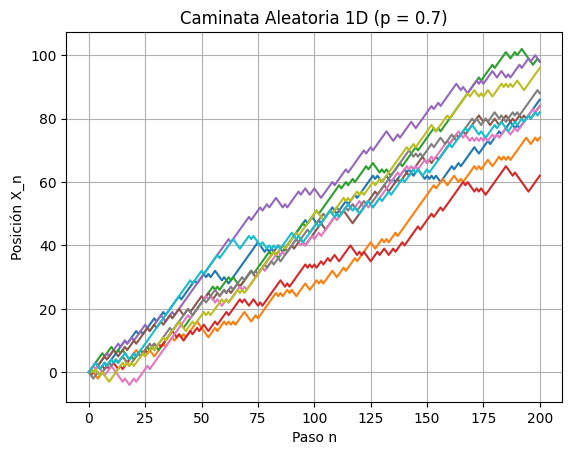

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def caminata_aleatoria_1D(n_pasos=100, p=0.5, n_trayectorias=5):
    """
    Simula n_trayectorias de una caminata aleatoria 1D
    con probabilidad p de moverse a la derecha.
    """
    q = 1 - p

    trayectorias = []

    for _ in range(n_trayectorias):
        pasos = np.random.choice([1, -1], size=n_pasos, p=[p, q])
        posicion = np.cumsum(pasos)
        posicion = np.insert(posicion, 0, 0)  # incluir X_0 = 0
        trayectorias.append(posicion)

    return np.array(trayectorias)

# Parámetros (puedes cambiar p aquí)
p = 0.7
n_pasos = 200
n_trayectorias = 10

trayectorias = caminata_aleatoria_1D(n_pasos, p, n_trayectorias)

# Graficar
plt.figure()
for trayectoria in trayectorias:
    plt.plot(trayectoria)

plt.xlabel("Paso n")
plt.ylabel("Posición X_n")
plt.title(f"Caminata Aleatoria 1D (p = {p})")
plt.grid()
plt.show()

#  Interpretación de los Resultados

Recordemos que:

$$
\mathbb{E}[X_n] = n(2p - 1)
$$

$$
\text{Var}(X_n) = 4np(1 - p)
$$

---

## Caso 1: Caminata Simétrica ($p = 0.5$)

Si $p = 0.5$, entonces:

$$
\mathbb{E}[X_n] = 0
$$

No existe deriva promedio y la caminata oscila alrededor del origen.

La varianza es:

$$
\text{Var}(X_n) = n
$$

---

## Caso 2: Deriva Positiva ($p > 0.5$)

Si $p > 0.5$, entonces:

$$
\mathbb{E}[X_n] > 0
$$

Existe una tendencia promedio a moverse hacia la derecha.

La pendiente media aproximada es:

$$
2p - 1
$$

---

## Caso 3: Deriva Negativa ($p < 0.5$)

Si $p < 0.5$, entonces:

$$
\mathbb{E}[X_n] < 0
$$

Existe una tendencia promedio a moverse hacia la izquierda.

---

## Crecimiento Asintótico

La desviación estándar crece como:

$$
\sqrt{\text{Var}(X_n)} = 2\sqrt{np(1 - p)}
$$

El crecimiento medio es proporcional a $n$ mientras que las fluctuaciones crecen como $\sqrt{n}$.

Por lo tanto, cuando $p \neq 0.5$, la deriva domina el comportamiento para valores grandes de $n$.